In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #The LabelEncoder is used for encoding categorical features into numerical values.
from sklearn.linear_model import LinearRegression
import seaborn as sns    #Seaborn provides a more streamlined way to create advanced visualizations than Matplotlib.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score   #used for evaluating the performance of regression models
import copy, math


from sklearn.impute import SimpleImputer   #used for imputing missing values in datasets.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler  #used for scaling features to a given range, usually between 0 and 1


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  #used for building Naive Bayes models


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#url = 'https://drive.google.com/uc?id={}'.format(1nmTNVmaTvyshdWQ1cIVp8Eiayfp0I9UB)

In [ ]:
data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO - CAR DETAILS FROM CAR DEKHO.csv')
data.head(7)

name  year  selling_price  km_driven    fuel  \
0              Maruti 800 AC  2007          60000      70000  Petrol   
1   Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2       Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3     Datsun RediGO T Option  2017         250000      46000  Petrol   
4      Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
5       Maruti Alto LX BSIII  2007         140000     125000  Petrol   
6  Hyundai Xcent 1.2 Kappa S  2016         550000      25000  Petrol   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
5  Individual       Manual   First Owner  
6  Individual       Manual   First Owner

In [ ]:
data.describe()   #It computes several summary statistics, including count, mean, standard deviation, minimum and maximum values, and the quartiles of the data. By default, only the numeric columns are returned, and the non-numeric columns are excluded.

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB



# **Data Preprocessing**





In [ ]:
data.isna().sum()       #used in Pandas library to count the number of missing values (NaN) in each column of a DataFrame

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data.shape

(4340, 8)

In [ ]:
#dropping the rows
data = data.dropna(axis = 0, subset = ['name', 'year','selling_price', 'fuel', 'seller_type', 'transmission','owner'])
print("Shape after dropping:", data.shape)

Shape after dropping: (4340, 8)


In [ ]:
"""data = data.dropna(axis = 1)
print("Shape after dropping:", data.shape)"""

'data = data.dropna(axis = 1)\nprint("Shape after dropping:", data.shape)'

In [ ]:
#imputing missing values


impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['km_driven']])  #it has to be 2D to pass as a dataframe

data['km_driven'] = impute.transform(data[['km_driven']])

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Label-> selling price

data['selling_price'].value_counts()

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

In [ ]:
print(data['selling_price'].min())
print(data['selling_price'].max())

20000
8900000


In [ ]:
bins=[20000,250000,400000,9000000]
labels=['low','medium','high']
data['selling_price']=pd.cut(data['selling_price'], bins, labels=labels)
data['selling_price'].value_counts()

selling_price
high      1916
low       1492
medium     931
Name: count, dtype: int64

In [ ]:
data.head(5)

name  year selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007           low    70000.0  Petrol   
1  Maruti Wagon R LXI Minor  2007           low    50000.0  Petrol   
2      Hyundai Verna 1.6 SX  2012          high   100000.0  Diesel   
3    Datsun RediGO T Option  2017           low    46000.0  Petrol   
4     Honda Amaze VX i-DTEC  2014          high   141000.0  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    1
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data = data.dropna(axis = 0, subset = ['selling_price'])

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Encoding categorical features

le = LabelEncoder()

data['name'] = le.fit_transform(data['name'])

data['selling_price'] = data['selling_price'].map({'low':0, 'medium':1, 'high':2})

data['transmission'] = le.fit_transform(data['transmission']) #binary

data['owner'] = data['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4,
                                   'Third Owner':3, 'Test Drive Car':0})  #ordinal categorical
data['fuel'] = data['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})

data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

<ipython-input-96-356e32bbd59d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-356e32bbd59d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-356e32bbd59d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-356e32b

In [ ]:
data.head()

name  year selling_price  km_driven  fuel  seller_type  transmission  owner
0   774  2007             0    70000.0     0            0             1      1
1  1040  2007             0    50000.0     0            0             1      1
2   504  2012             2   100000.0     1            0             1      1
3   118  2017             0    46000.0     0            0             1      1
4   278  2014             2   141000.0     1            0             1      2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4339 non-null   int64   
 1   year           4339 non-null   int64   
 2   selling_price  4339 non-null   category
 3   km_driven      4339 non-null   float64 
 4   fuel           4339 non-null   int64   
 5   seller_type    4339 non-null   int64   
 6   transmission   4339 non-null   int64   
 7   owner          4339 non-null   int64   
dtypes: category(1), float64(1), int64(6)
memory usage: 275.6 KB


In [ ]:
data['selling_price']=data['selling_price'].astype(int)

<ipython-input-99-b87f49117152>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4339 non-null   int64  
 1   year           4339 non-null   int64  
 2   selling_price  4339 non-null   int64  
 3   km_driven      4339 non-null   float64
 4   fuel           4339 non-null   int64  
 5   seller_type    4339 non-null   int64  
 6   transmission   4339 non-null   int64  
 7   owner          4339 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 305.1 KB


# **Data Visualization**

In [ ]:
from scipy.stats import norm   #provides functions for working with normal (Gaussian) distributions, such as probability density functions, cumulative distribution functions, and inverse cumulative distribution functions.
from scipy import stats       #provides functions and classes for working with probability distributions, statistical tests, and descriptive statistics

In [ ]:
#skewness
print("Skewness: %f" % data['selling_price'].skew())

#since the skewness value is close to zero, we can say that the distribution of 'selling_price' is approximately symmetric, or normally distributed

Skewness: -0.191262


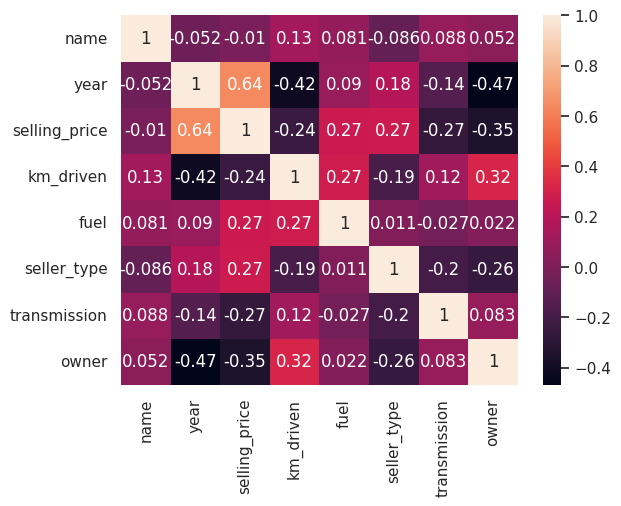

In [ ]:
plt.figure()
sns.heatmap(data.corr(), annot=True)

plt.show()

#visualize the pairwise correlations between the variables in a Pandas DataFrame

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(data,names='selling_price',title='Proportion Low, Medium, High car price',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

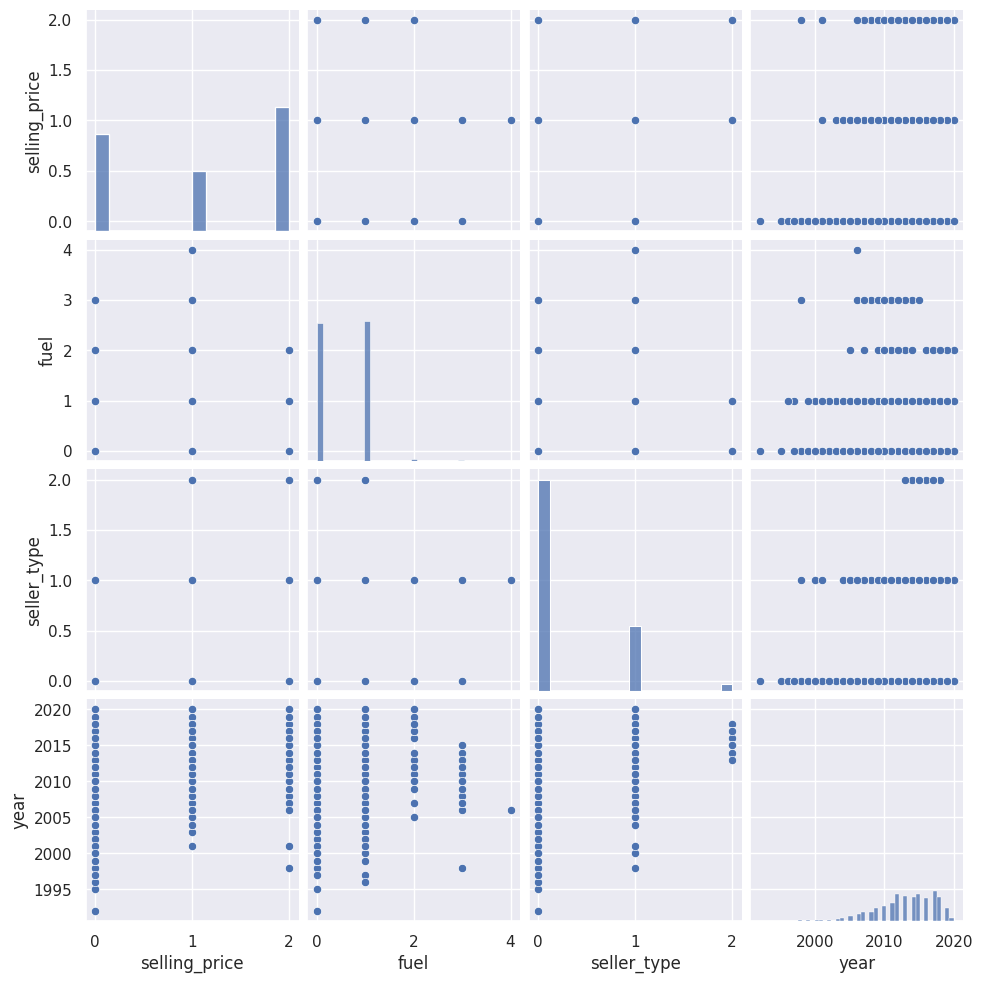

In [ ]:
#scatterplot
sns.set()
cols = ['selling_price', 'fuel', 'seller_type', 'year']
sns.pairplot(data[cols], height = 2.5)
plt.show()

In [ ]:
fig = px.bar(data, x='selling_price', y='year',title='Price Vs Year',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

## Over_sampling technique


<Axes: title={'center': 'Label Distribution Before Oversampling'}, xlabel='selling_price'>

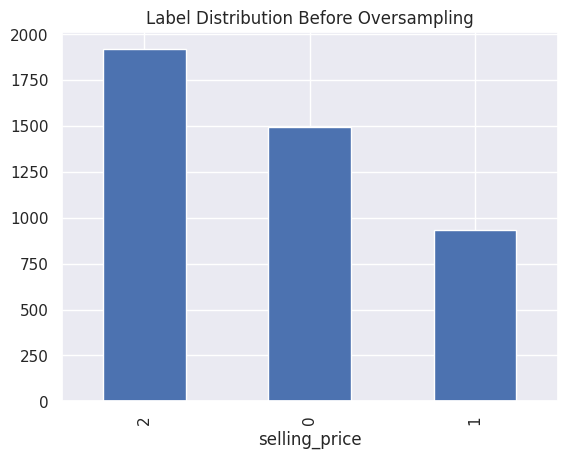

In [ ]:
data['selling_price'].value_counts().plot(kind='bar', title='Label Distribution Before Oversampling')

In [ ]:
#oversampling

class_0 = data[data['selling_price'] == 0]
class_1 = data[data['selling_price'] == 1]
class_2 = data[data['selling_price'] == 2]

<Axes: title={'center': 'Label Distribution after Oversampling'}, xlabel='selling_price'>

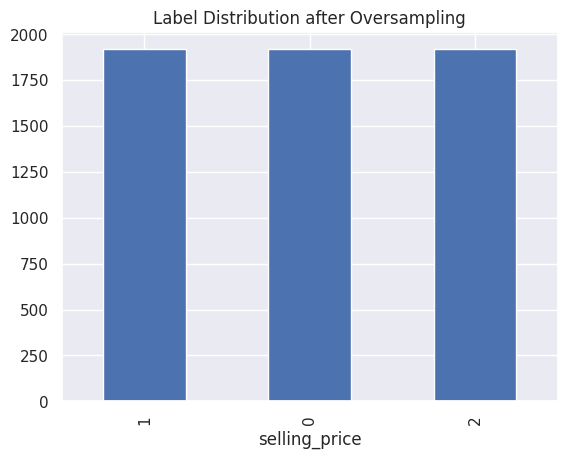

In [ ]:
class_1_over = class_1.sample(len(class_2), replace=True)
class_0_over = class_0.sample(len(class_2), replace=True)

df_new = pd.concat([class_1_over,class_0_over, class_2], axis=0)

df_new['selling_price'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [ ]:
df_new['selling_price'].value_counts()

selling_price
1    1916
0    1916
2    1916
Name: count, dtype: int64

In [ ]:
df_new.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
952    563  2013              1    38000.0     0            1             0   
4282  1032  2013              1    52000.0     0            0             1   
2959   970  2014              1   100000.0     1            0             1   
967    808  2019              1     5000.0     0            0             1   
2024  1327  2016              1    38000.0     1            1             1   

      owner  
952       1  
4282      1  
2959      2  
967       1  
2024      1

In [ ]:
Y = data['selling_price']
X = data.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)
X

year  fuel  seller_type
0     2007     0            0
1     2007     0            0
2     2012     1            0
3     2017     0            0
4     2014     1            0
...    ...   ...          ...
4335  2014     1            0
4336  2014     1            0
4337  2009     0            0
4338  2016     1            0
4339  2016     0            0

[4339 rows x 3 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.64


# **Train/Test split**

In [ ]:
Y = df_new['selling_price']
X = df_new.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)

X_features = data.columns

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# Model selection

we choose our models to train our machine.<br>

models we use :<br>
<ol>
1. KNN<br>
2. LogisticRegression<br>
3. SVM<br>
4. Decission Tree<br>
5. Random Forest<br>
6. Gradient Boosting Classifier<br>
7.Adabost
</ol>

#KNN

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
accuracies = {}
print("Test set accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.584


In [ ]:
predictions1 = knn.predict(X_test)
a1=accuracy_score(y_test, predictions1)
print(a1)
accuracies['KNN'] = a1

0.5843478260869566


In [ ]:
classificationreport = classification_report(y_test, predictions1)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       566
           1       0.48      0.46      0.47       607
           2       0.71      0.63      0.67       552

    accuracy                           0.58      1725
   macro avg       0.59      0.59      0.59      1725
weighted avg       0.59      0.58      0.58      1725



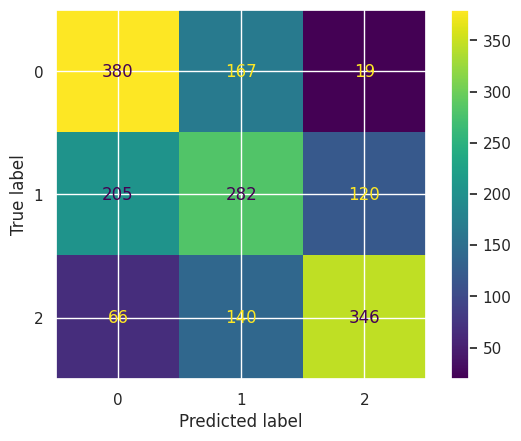

In [ ]:
cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#LogisticRegression

In [ ]:
lr = LogisticRegression()  #Used when the target variable is categorical. Good for binary classification problems
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions2 = lr.predict(X_test)
a2=accuracy_score(y_test, predictions2)
print(a2)
accuracies['Logistic Regression'] = a2

0.4579710144927536


In [ ]:
classificationreport = classification_report(y_test, predictions2)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       566
           1       0.00      0.00      0.00       607
           2       0.43      0.83      0.57       552

    accuracy                           0.46      1725
   macro avg       0.31      0.47      0.37      1725
weighted avg       0.30      0.46      0.36      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



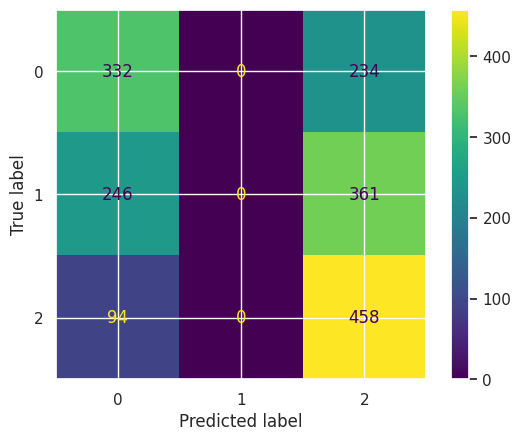

In [ ]:
cm = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC #
mode = SVC()
mode.fit(X_train,y_train)

SVC()

In [ ]:
predictions3 = mode.predict(X_test)
a3=accuracy_score(y_test, predictions3)
print(a3)
accuracies['SVM'] = a3

0.32


In [ ]:
classificationreport = classification_report(y_test, predictions3)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.00      0.00      0.00       607
           2       0.32      1.00      0.48       552

    accuracy                           0.32      1725
   macro avg       0.11      0.33      0.16      1725
weighted avg       0.10      0.32      0.16      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



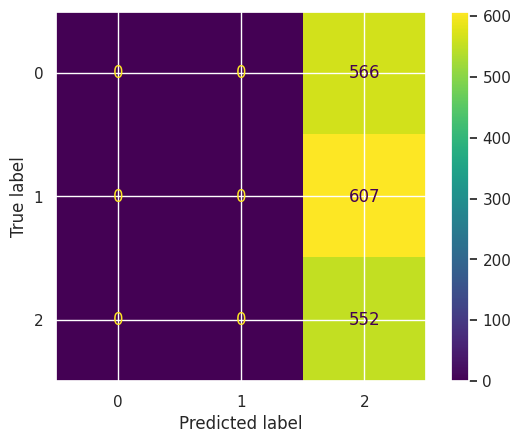

In [ ]:
cm = confusion_matrix(y_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#DECISSION TREE

In [ ]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
predictions4 = clf.predict(X_test)
a4=accuracy_score(predictions4,y_test)
print(a4)
accuracies['Decision Tree'] = a4

0.6423188405797101


In [ ]:
classificationreport = classification_report(y_test, predictions4)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       566
           1       0.54      0.52      0.53       607
           2       0.69      0.73      0.71       552

    accuracy                           0.64      1725
   macro avg       0.64      0.65      0.64      1725
weighted avg       0.64      0.64      0.64      1725



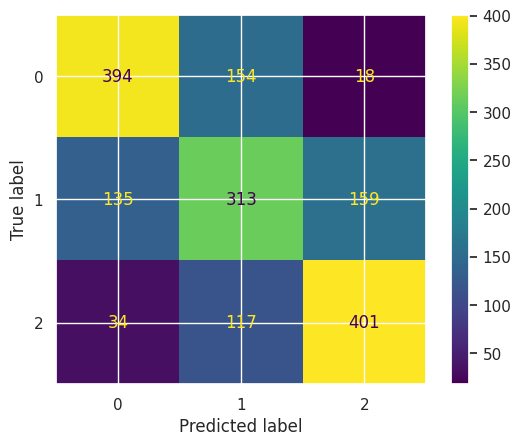

In [ ]:
cm = confusion_matrix(y_test, predictions4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=4000)
tree.plot_tree(clf,feature_names = X.columns, class_names=['1','2','3'],filled = True)

[Text(0.46103395061728397, 0.9545454545454546, 'year <= 2012.5\nentropy = 1.585\nsamples = 4023\nvalue = [1350, 1309, 1364]\nclass = 3'),
 Text(0.24074074074074073, 0.8636363636363636, 'year <= 2009.5\nentropy = 1.237\nsamples = 1670\nvalue = [1053, 476, 141]\nclass = 1'),
 Text(0.15020576131687244, 0.7727272727272727, 'fuel <= 0.5\nentropy = 0.73\nsamples = 789\nvalue = [669, 94, 26]\nclass = 1'),
 Text(0.09670781893004116, 0.6818181818181818, 'year <= 2007.5\nentropy = 0.418\nsamples = 561\nvalue = [522, 30, 9]\nclass = 1'),
 Text(0.06172839506172839, 0.5909090909090909, 'year <= 2005.5\nentropy = 0.269\nsamples = 343\nvalue = [330, 5, 8]\nclass = 1'),
 Text(0.0411522633744856, 0.5, 'year <= 2001.5\nentropy = 0.154\nsamples = 179\nvalue = [175, 0, 4]\nclass = 1'),
 Text(0.03292181069958848, 0.4090909090909091, 'year <= 1998.5\nentropy = 0.408\nsamples = 49\nvalue = [45, 0, 4]\nclass = 1'),
 Text(0.01646090534979424, 0.3181818181818182, 'year <= 1997.5\nentropy = 0.619\nsamples = 13\n

In [ ]:
# @title RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate the Random Forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy:", accuracy_rf)
accuracies['Random Forest'] = accuracy_rf


Accuracy: 0.638840579710145


In [ ]:
classification_report_rf = classification_report(y_test, predictions_rf)
print("Classification Report:\n", classification_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       566
           1       0.53      0.52      0.52       607
           2       0.69      0.73      0.71       552

    accuracy                           0.64      1725
   macro avg       0.64      0.64      0.64      1725
weighted avg       0.64      0.64      0.64      1725



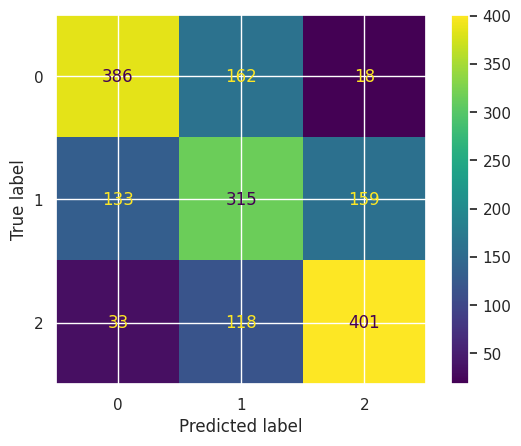

In [ ]:
cm_rf = confusion_matrix(y_test, predictions_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

In [ ]:
# @title Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate the Gradient Boosting model
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test set
predictions_gb = gb.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, predictions_gb)
print("Accuracy:", accuracy_gb)
accuracies['Gradient Boosting'] = accuracy_gb



Accuracy: 0.6353623188405797


In [ ]:
classification_report_gb = classification_report(y_test, predictions_gb)
print("Classification Report:\n", classification_report_gb)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       566
           1       0.52      0.51      0.52       607
           2       0.68      0.74      0.71       552

    accuracy                           0.64      1725
   macro avg       0.64      0.64      0.64      1725
weighted avg       0.64      0.64      0.63      1725



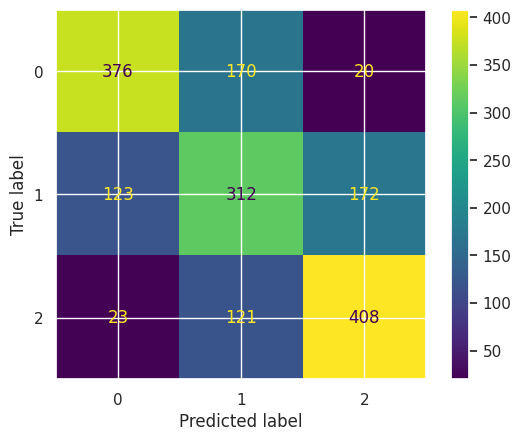

In [ ]:
cm_gb = confusion_matrix(y_test, predictions_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.show()

In [ ]:
# @title AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate the AdaBoost model
adaboost = AdaBoostClassifier()

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
predictions_adaboost = adaboost.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, predictions_adaboost)
print("Accuracy:", accuracy_adaboost)
accuracies['AdaBoost'] = accuracy_adaboost



Accuracy: 0.6440579710144928


In [ ]:
classification_report_adaboost = classification_report(y_test, predictions_adaboost)
print("Classification Report:\n", classification_report_adaboost)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       566
           1       0.52      0.56      0.54       607
           2       0.70      0.73      0.71       552

    accuracy                           0.64      1725
   macro avg       0.65      0.65      0.65      1725
weighted avg       0.65      0.64      0.65      1725



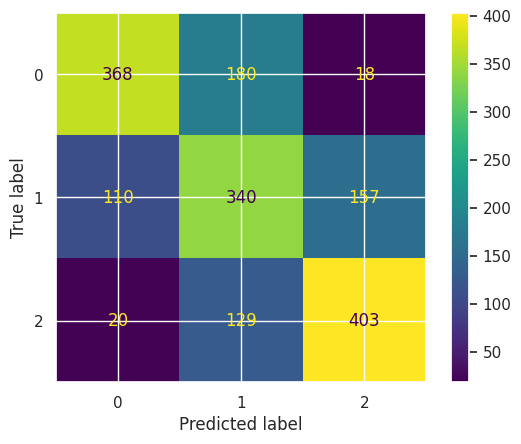

In [ ]:
cm_adaboost = confusion_matrix(y_test, predictions_adaboost)
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost)
disp_adaboost.plot()
plt.show()

<ipython-input-142-26a6dcc525b5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




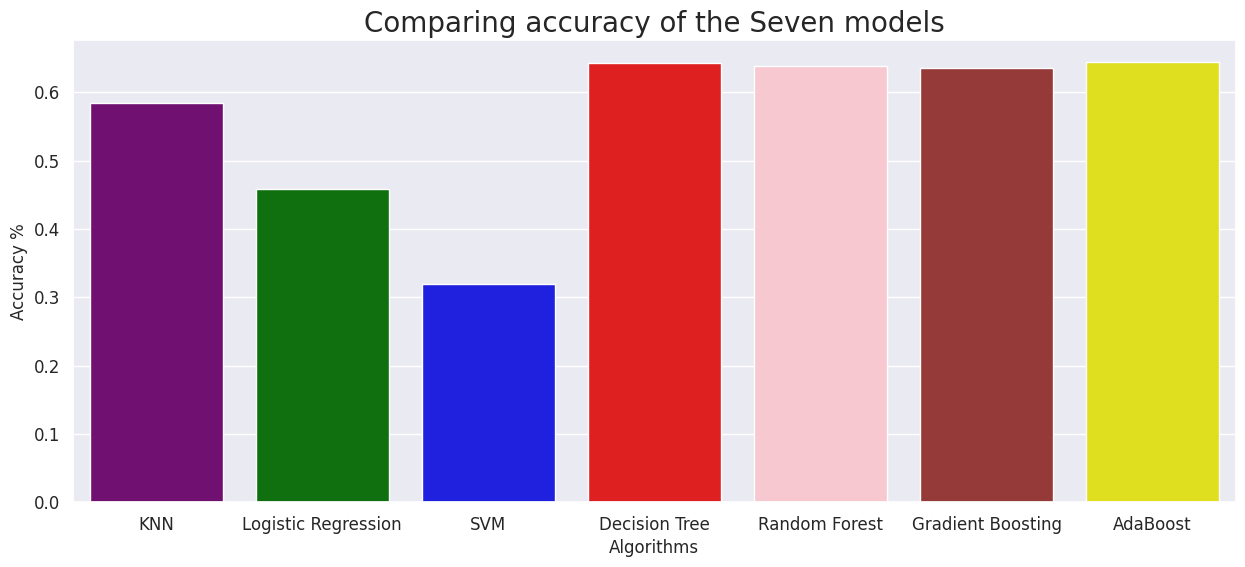

In [ ]:
colors = ["purple", "green", "blue", "red","pink","Brown","Yellow"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the Seven models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

Model Testing

In [ ]:
X_test

year  fuel  seller_type
3640  2012     0            0
3229  2016     1            0
3787  2011     1            0
813   2016     1            0
2067  2017     0            0
...    ...   ...          ...
3330  2015     0            0
2646  2008     1            0
1349  2012     0            0
66    2014     1            1
1587  2012     1            0

[1725 rows x 3 columns]